In [17]:
import os
import torch
import torchvision

from pipeline.train import Trainer
from model_architecture.darknet import YOLO
from pipeline.yolodataset import YOLODataset
from pipeline.deeplontardataset import visualize_dataset
from pipeline.deeplontardataset import DeepLontarDataset

In [14]:
data_root_dir = 'C:\\Users\\rudyh\\Documents\\Python\\datasets\\DeepLontar-Dataset'
image_dir = os.path.join(data_root_dir, 'images')
label_dir = os.path.join(data_root_dir, 'labels')

# dataset = DeepLontarDataset(image_dir=image_dir, label_dir=label_dir)
dataset = YOLODataset(image_dir=image_dir, label_dir=label_dir)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 55
anchors = [[10, 14], [23, 27], [37, 58], [81, 82], [135, 169], [344, 319]]
# input_shape = (416, 416)

# Data Transformation
data_transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define model
batch_size = 4
learning_rate = 1e-3
num_epochs = 3

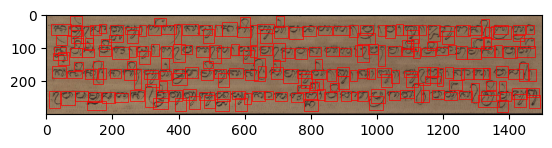

In [15]:
visualize_dataset(dataset, 0)

In [27]:
import matplotlib.pyplot as plt

cols, rows = 2, 2
for i in range(1, cols*rows + 1):
	sample_idx = torch.randint(len(dataset), size=(1,)).item()
	image, boxes = dataset[sample_idx]
	print(boxes[:][:-1])

# torch.randint(len(dataset), size=(1,)).item()

[[0.017333, 0.11333299999999999, 0.041333, 0.23333299999999998, 8], [0.0460005, 0.11999950000000001, 0.0673335, 0.2066665, 0], [0.053333, 0.15999999999999998, 0.069333, 0.31, 37], [0.152, 0.166667, 0.168, 0.316667, 37], [0.730667, 0.1333335, 0.744667, 0.2800005, 37], [0.5593334999999999, 0.1466665, 0.5726665, 0.2499995, 37], [0.176667, 0.153333, 0.192667, 0.303333, 37], [0.675333, 0.3766665, 0.689333, 0.5233335, 37], [0.913333, 0.3799995, 0.927333, 0.5266664999999999, 37], [0.550667, 0.5899995, 0.564667, 0.7366664999999999, 37], [0.635333, 0.5766665, 0.649333, 0.7233335000000001, 37], [0.396667, 0.8366665, 0.410667, 0.9833335000000001, 37], [0.029332999999999998, 0.8266665, 0.043332999999999997, 0.9733335000000001, 37], [0.0673335, 0.126667, 0.0920005, 0.236667, 15], [0.5366664999999999, 0.6966669999999999, 0.5639995, 0.776667, 41], [0.0633335, 0.04666699999999999, 0.0906665, 0.126667, 41], [0.40133349999999995, 0.023333, 0.4286665, 0.10333300000000001, 41], [0.9300005, 0.2333329999999